<center><h1>Ma_Htet_HW8</h1></center>

Name: Htet Ma
<br>
Github Username: hswma
<br>
USC ID: 4522446617

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.special import softmax
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, hamming_loss, zero_one_loss, silhouette_score
from sklearn.svm import LinearSVC
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics.pairwise import euclidean_distances
from collections import Counter
from scipy.spatial import distance

os.chdir('../data')

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
dfcancer = pd.read_csv('wdbc.csv', header=None)
dfcancerx = dfcancer.iloc[:,2:]
dfcancery = dfcancer.iloc[:,1]
dfcancer

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

In [3]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
train_index, test_index = next(sss.split(dfcancerx, dfcancery))
x_train, x_test = dfcancerx.iloc[train_index], dfcancerx.iloc[test_index]
y_train, y_test = dfcancery.iloc[train_index], dfcancery.iloc[test_index]
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

M = range(1,31,1)
results_train = {'train_acc': [],'train_prec': [],'train_rec': [],'train_f1': [],'train_cm': [],'train_auc': []}
results_test = {'test_acc': [],'test_prec': [],'test_rec': [],'test_f1': [],'test_cm': [],'test_auc': []}

for ib1 in M:
    print('Run', ib1, 'is completed')
    svm = LinearSVC(penalty='l1', dual=False)
    param_grid = {'C': [0.01, 1, 10, 100]}
    grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(x_train, y_train)
    best_params = grid_search.best_params_
    svm.set_params(**best_params)
    svm.fit(x_train, y_train)
    trainy_pred = svm.predict(x_train)
    testy_pred = svm.predict(x_test)
    train_acc = accuracy_score(y_train, trainy_pred)
    test_acc = accuracy_score(y_test, testy_pred)
    train_prec = precision_score(y_train, trainy_pred, pos_label='M')
    test_prec = precision_score(y_test, testy_pred, pos_label='M')
    train_rec = recall_score(y_train, trainy_pred, pos_label='M')
    test_rec = recall_score(y_test, testy_pred, pos_label='M')
    train_f1 = f1_score(y_train, trainy_pred, pos_label='M')
    test_f1 = f1_score(y_test, testy_pred, pos_label='M')
    train_cm = confusion_matrix(y_train, trainy_pred)
    test_cm = confusion_matrix(y_test, testy_pred)
    trainy_score = svm.decision_function(x_train)
    testy_score = svm.decision_function(x_test)
    train_auc = roc_auc_score(y_train, trainy_score)
    test_auc = roc_auc_score(y_test, testy_score)
    fpr_train, tpr_train, _ = roc_curve(y_train, trainy_score, pos_label='M')
    fpr_test, tpr_test, _ = roc_curve(y_test, testy_score, pos_label='M')
    
    results_train['train_acc'].append(train_acc)
    results_train['train_prec'].append(train_prec)
    results_train['train_rec'].append(train_rec)
    results_train['train_f1'].append(train_f1)
    results_train['train_cm'].append(train_cm)
    results_train['train_auc'].append(train_auc)
    
    results_test['test_acc'].append(test_acc)
    results_test['test_prec'].append(test_prec)
    results_test['test_rec'].append(test_rec)
    results_test['test_f1'].append(test_f1)
    results_test['test_cm'].append(test_cm)
    results_test['test_auc'].append(test_auc)    

Run 1 is completed
Run 2 is completed
Run 3 is completed
Run 4 is completed
Run 5 is completed
Run 6 is completed
Run 7 is completed
Run 8 is completed
Run 9 is completed
Run 10 is completed
Run 11 is completed
Run 12 is completed
Run 13 is completed
Run 14 is completed
Run 15 is completed
Run 16 is completed
Run 17 is completed
Run 18 is completed
Run 19 is completed
Run 20 is completed
Run 21 is completed
Run 22 is completed
Run 23 is completed
Run 24 is completed
Run 25 is completed
Run 26 is completed
Run 27 is completed
Run 28 is completed
Run 29 is completed
Run 30 is completed


Training data, supervised learning averages have 
Accuracy: 0.9934065934065934 
Precision: 1.0 
Recall: 0.9823529411764702 
F1 score: 0.9910979228486644 
AUC: 0.9986996904024764

Test data, supervised learning averages have 
Accuracy: 0.9385964912280699 
Precision: 0.9268292682926828 
Recall: 0.9047619047619049 
F1 score: 0.9156626506024098 
AUC: 0.9904100529100531


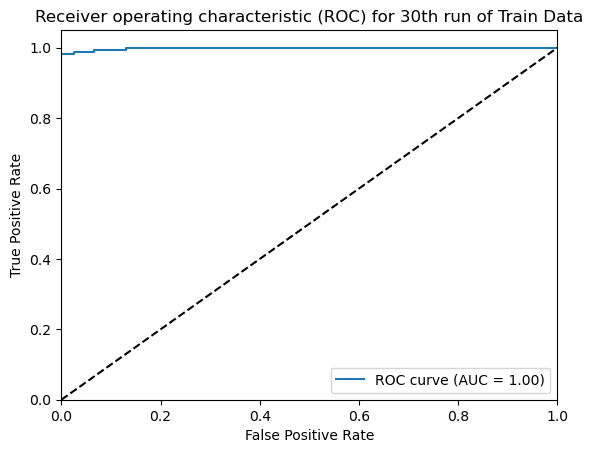

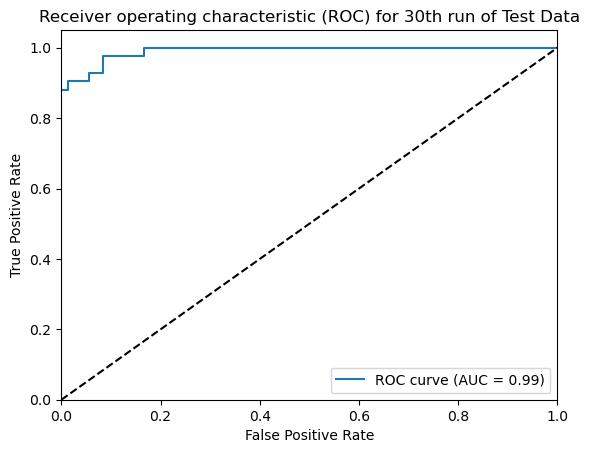

<function matplotlib.pyplot.show(close=None, block=None)>

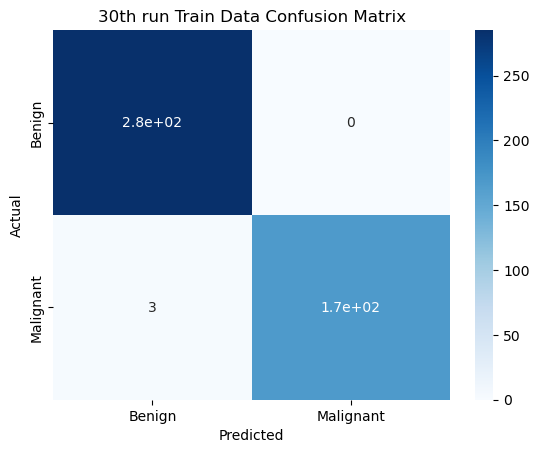

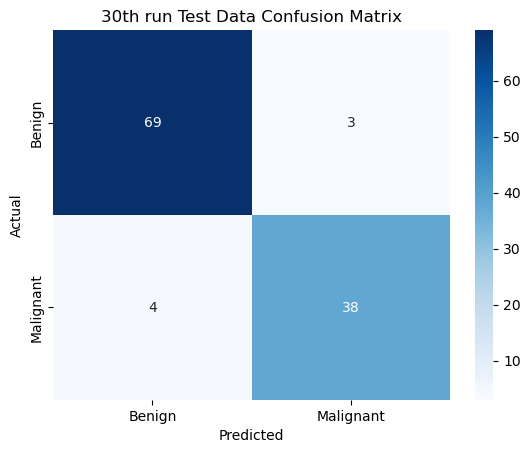

In [4]:
ib1_train_acc_avg = np.mean(results_train['train_acc'])
ib1_train_prec_avg = np.mean(results_train['train_prec'])
ib1_train_rec_avg = np.mean(results_train['train_rec'])
ib1_train_f1_avg = np.mean(results_train['train_f1'])
ib1_train_auc_avg = np.mean(results_train['train_auc'])
ib1_test_acc_avg = np.mean(results_test['test_acc'])
ib1_test_prec_avg = np.mean(results_test['test_prec'])
ib1_test_rec_avg = np.mean(results_test['test_rec'])
ib1_test_f1_avg = np.mean(results_test['test_f1'])
ib1_test_auc_avg = np.mean(results_test['test_auc'])
print(f'Training data, supervised learning averages have \nAccuracy:', ib1_train_acc_avg, '\nPrecision:', ib1_train_prec_avg,
     '\nRecall:', ib1_train_rec_avg, '\nF1 score:', ib1_train_f1_avg, '\nAUC:', ib1_train_auc_avg)
print(f'\nTest data, supervised learning averages have \nAccuracy:', ib1_test_acc_avg, '\nPrecision:', ib1_test_prec_avg,
     '\nRecall:', ib1_test_rec_avg, '\nF1 score:', ib1_test_f1_avg, '\nAUC:', ib1_test_auc_avg)

plt.plot(fpr_train, tpr_train, label='ROC curve (AUC = %0.2f)' % train_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) for 30th run of Train Data')
plt.legend(loc="lower right")
plt.show()

plt.plot(fpr_test, tpr_test, label='ROC curve (AUC = %0.2f)' % test_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) for 30th run of Test Data')
plt.legend(loc="lower right")
plt.show()

action = ['Benign', 'Malignant']
plt.figure()
sns.heatmap(train_cm, annot=True, cmap='Blues', xticklabels=action, yticklabels=action)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('30th run Train Data Confusion Matrix')
plt.show

plt.figure()
sns.heatmap(test_cm, annot=True, cmap='Blues', xticklabels=action, yticklabels=action)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('30th run Test Data Confusion Matrix')
plt.show

#### (ii) Semi-Supervised Learning/ Self-training

##### (A)

In [5]:
trainsss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
label_index, unlabel_index = next(trainsss.split(x_train, y_train))
x_label, x_unlabel = x_train[label_index], x_train[unlabel_index]
y_label, y_unlabel = y_train.iloc[label_index], y_train.iloc[unlabel_index]
y_label = np.array(y_label)
y_unlabel = np.array(y_unlabel)
svm = LinearSVC(penalty='l1', dual=False)
param_grid = {'C': [0.01, 1, 10, 100]}
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_label, y_label)
best_params = grid_search.best_params_
svm.set_params(**best_params)
svm.fit(x_label, y_label)

LinearSVC(C=1, dual=False, penalty='l1')

##### (B)

In [6]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    while len(x_unlabel) > 0:
        unlabel_score = svm.decision_function(x_unlabel)
        dist_boundary = np.abs(unlabel_score)
        far_idx = np.argmax(dist_boundary)
        x_label = np.vstack((x_label, x_unlabel[far_idx]))
        y_label = np.hstack((y_label, svm.predict(x_unlabel[far_idx].reshape(1, -1))))
        x_unlabel = np.delete(x_unlabel, far_idx, axis=0)
        y_unlabel = np.delete(y_unlabel, far_idx)
        svm.fit(x_label, y_label)
    trainy_pred = svm.predict(x_label)
    testy_pred = svm.predict(x_test)
    train_acc = accuracy_score(y_label, trainy_pred)
    test_acc = accuracy_score(y_test, testy_pred)
    train_prec = precision_score(y_label, trainy_pred, pos_label='M')
    test_prec = precision_score(y_test, testy_pred, pos_label='M')
    train_rec = recall_score(y_label, trainy_pred, pos_label='M')
    test_rec = recall_score(y_test, testy_pred, pos_label='M')
    train_f1 = f1_score(y_label, trainy_pred, pos_label='M')
    test_f1 = f1_score(y_test, testy_pred, pos_label='M')
    train_cm = confusion_matrix(y_label, trainy_pred)
    test_cm = confusion_matrix(y_test, testy_pred)
    trainy_score = svm.decision_function(x_label)
    testy_score = svm.decision_function(x_test)
    train_auc = roc_auc_score(y_label, trainy_score)
    test_auc = roc_auc_score(y_test, testy_score)
    fpr_train, tpr_train, _ = roc_curve(y_label, trainy_score, pos_label='M')
    fpr_test, tpr_test, _ = roc_curve(y_test, testy_score, pos_label='M')

###### 30 run

In [7]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    M = range(1,31,1)
    results_train = {'train_acc': [],'train_prec': [],'train_rec': [],'train_f1': [],'train_cm': [],'train_auc': []}
    results_test = {'test_acc': [],'test_prec': [],'test_rec': [],'test_f1': [],'test_cm': [],'test_auc': []}

    for ib1 in M:
        print('Run', ib1, 'is completed')
        trainsss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
        label_index, unlabel_index = next(trainsss.split(x_train, y_train))
        x_label, x_unlabel = x_train[label_index], x_train[unlabel_index]
        y_label, y_unlabel = y_train.iloc[label_index], y_train.iloc[unlabel_index]
        y_label = np.array(y_label)
        y_unlabel = np.array(y_unlabel)
        svm = LinearSVC(penalty='l1', dual=False)
        param_grid = {'C': [0.01, 1, 10, 100]}
        grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5, n_jobs=-1)
        grid_search.fit(x_label, y_label)
        best_params = grid_search.best_params_
        svm.set_params(**best_params)
        svm.fit(x_label, y_label)
        while len(x_unlabel) > 0:
            unlabel_score = svm.decision_function(x_unlabel)
            dist_boundary = np.abs(unlabel_score)
            far_idx = np.argmax(dist_boundary)
            x_label = np.vstack((x_label, x_unlabel[far_idx]))
            y_label = np.hstack((y_label, svm.predict(x_unlabel[far_idx].reshape(1, -1))))
            x_unlabel = np.delete(x_unlabel, far_idx, axis=0)
            y_unlabel = np.delete(y_unlabel, far_idx)
            svm.fit(x_label, y_label)
        trainy_pred = svm.predict(x_label)
        testy_pred = svm.predict(x_test)
        train_acc = accuracy_score(y_label, trainy_pred)
        test_acc = accuracy_score(y_test, testy_pred)
        train_prec = precision_score(y_label, trainy_pred, pos_label='M')
        test_prec = precision_score(y_test, testy_pred, pos_label='M')
        train_rec = recall_score(y_label, trainy_pred, pos_label='M')
        test_rec = recall_score(y_test, testy_pred, pos_label='M')
        train_f1 = f1_score(y_label, trainy_pred, pos_label='M')
        test_f1 = f1_score(y_test, testy_pred, pos_label='M')
        train_cm = confusion_matrix(y_label, trainy_pred)
        test_cm = confusion_matrix(y_test, testy_pred)
        trainy_score = svm.decision_function(x_label)
        testy_score = svm.decision_function(x_test)
        train_auc = roc_auc_score(y_label, trainy_score)
        test_auc = roc_auc_score(y_test, testy_score)
        fpr_train, tpr_train, _ = roc_curve(y_label, trainy_score, pos_label='M')
        fpr_test, tpr_test, _ = roc_curve(y_test, testy_score, pos_label='M')

        results_train['train_acc'].append(train_acc)
        results_train['train_prec'].append(train_prec)
        results_train['train_rec'].append(train_rec)
        results_train['train_f1'].append(train_f1)
        results_train['train_cm'].append(train_cm)
        results_train['train_auc'].append(train_auc)

        results_test['test_acc'].append(test_acc)
        results_test['test_prec'].append(test_prec)
        results_test['test_rec'].append(test_rec)
        results_test['test_f1'].append(test_f1)
        results_test['test_cm'].append(test_cm)
        results_test['test_auc'].append(test_auc)  

Run 1 is completed
Run 2 is completed
Run 3 is completed
Run 4 is completed
Run 5 is completed
Run 6 is completed
Run 7 is completed
Run 8 is completed
Run 9 is completed
Run 10 is completed
Run 11 is completed
Run 12 is completed
Run 13 is completed
Run 14 is completed
Run 15 is completed
Run 16 is completed
Run 17 is completed
Run 18 is completed
Run 19 is completed
Run 20 is completed
Run 21 is completed
Run 22 is completed
Run 23 is completed
Run 24 is completed
Run 25 is completed
Run 26 is completed
Run 27 is completed
Run 28 is completed
Run 29 is completed
Run 30 is completed


Training data, semi-supervised learning averages have 
Accuracy: 0.9934065934065934 
Precision: 0.9938650306748468 
Recall: 0.9878048780487806 
F1 score: 0.9908256880733942 
AUC: 0.9997904618221439

Test data, semi-supervised learning averages have 
Accuracy: 0.9473684210526313 
Precision: 0.9285714285714283 
Recall: 0.9285714285714283 
F1 score: 0.9285714285714283 
AUC: 0.986111111111111


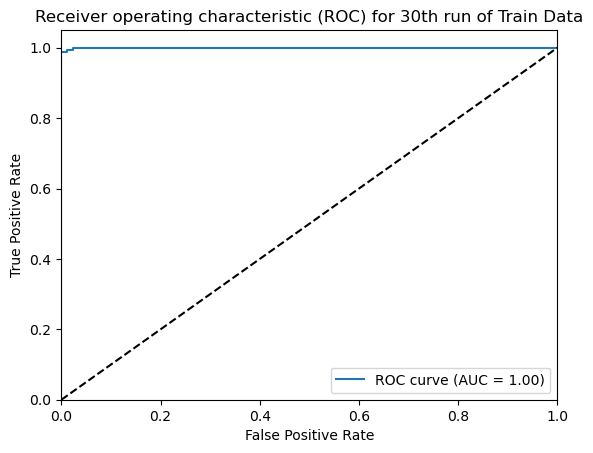

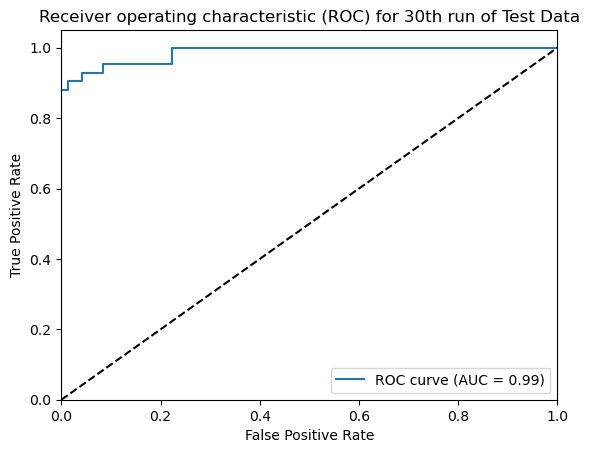

<function matplotlib.pyplot.show(close=None, block=None)>

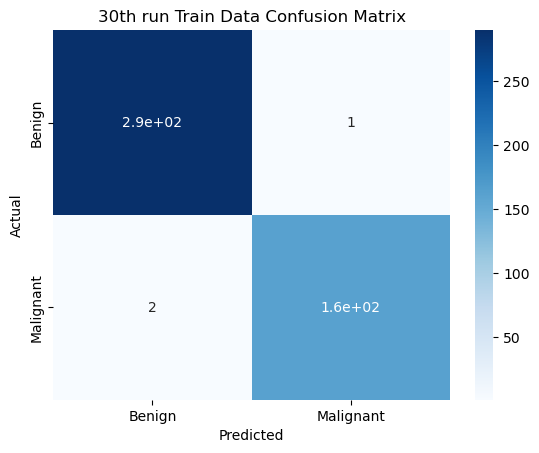

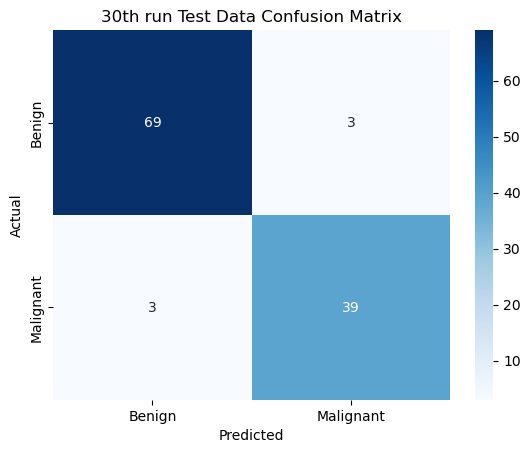

In [8]:
ii1_train_acc_avg = np.mean(results_train['train_acc'])
ii1_train_prec_avg = np.mean(results_train['train_prec'])
ii1_train_rec_avg = np.mean(results_train['train_rec'])
ii1_train_f1_avg = np.mean(results_train['train_f1'])
ii1_train_auc_avg = np.mean(results_train['train_auc'])
ii1_test_acc_avg = np.mean(results_test['test_acc'])
ii1_test_prec_avg = np.mean(results_test['test_prec'])
ii1_test_rec_avg = np.mean(results_test['test_rec'])
ii1_test_f1_avg = np.mean(results_test['test_f1'])
ii1_test_auc_avg = np.mean(results_test['test_auc'])
print(f'Training data, semi-supervised learning averages have \nAccuracy:', ii1_train_acc_avg, '\nPrecision:', ii1_train_prec_avg,
     '\nRecall:', ii1_train_rec_avg, '\nF1 score:', ii1_train_f1_avg, '\nAUC:', ii1_train_auc_avg)
print(f'\nTest data, semi-supervised learning averages have \nAccuracy:', ii1_test_acc_avg, '\nPrecision:', ii1_test_prec_avg,
     '\nRecall:', ii1_test_rec_avg, '\nF1 score:', ii1_test_f1_avg, '\nAUC:', ii1_test_auc_avg)

plt.plot(fpr_train, tpr_train, label='ROC curve (AUC = %0.2f)' % train_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) for 30th run of Train Data')
plt.legend(loc="lower right")
plt.show()

plt.plot(fpr_test, tpr_test, label='ROC curve (AUC = %0.2f)' % test_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) for 30th run of Test Data')
plt.legend(loc="lower right")
plt.show()

action = ['Benign', 'Malignant']
plt.figure()
sns.heatmap(train_cm, annot=True, cmap='Blues', xticklabels=action, yticklabels=action)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('30th run Train Data Confusion Matrix')
plt.show

plt.figure()
sns.heatmap(test_cm, annot=True, cmap='Blues', xticklabels=action, yticklabels=action)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('30th run Test Data Confusion Matrix')
plt.show

#### (iii) Unsupervised Learning

##### (A)

In [9]:
x_kmean = np.array(x_train)
y_kmean = np.array(y_train)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
#Reference: https://stackoverflow.com/questions/43789602/avoiding-local-minima-when-using-kmeans#:~:text=Use%20a%20better%20initialization%20algorithm.&text=This%20makes%20it%20likely%20that,required%20for%20KMeans%20to%20converge.
    print(f'We run the k-means multiple times to make sure it is not trapped in local minimum')
    kmeans = KMeans(n_clusters=2, init='random', n_init=100)
    kmeans.fit(x_kmean)

We run the k-means multiple times to make sure it is not trapped in local minimum


##### (B)

In [10]:
def get_softmax_probs(x_kmean, centers, pos_idx=1):
    testprobs = []
    for ridx, rows in enumerate(x_kmean):
        dist_centers = []
        for center_point in centers:
            dist = np.linalg.norm(rows - center_point)
            dist_centers.append(dist)
        dist_centers = np.array(dist_centers).T
        prob = softmax(dist_centers, axis=0)[1 - pos_idx]
        testprobs.append(prob)
    testprobs = np.array(testprobs)
    return testprobs

In [11]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    closest = 30
    closest_indices = []
    centers = []
    for cluster in range(2):
        center = kmeans.cluster_centers_[cluster]
        centers.append(center)
        dist = np.linalg.norm(x_kmean - center, axis=1)
        closest_indices_cluster = list(np.argsort(dist)[:closest])
        closest_indices.append(closest_indices_cluster)

    cluster_label = {}
    for eachcluster in range(2):
        truelabel = y_kmean[closest_indices[eachcluster]]
        majority = Counter(truelabel).most_common(1)[0][0]
        cluster_label.update({eachcluster : majority})
    reverse_cluster_label = {v: k for k, v in cluster_label.items()}

    probs = get_softmax_probs(x_kmean, centers)
        
    pred_cluster = kmeans.labels_
    pred_y = [cluster_label[x] for x in pred_cluster]

    train_acc = accuracy_score(y_kmean, pred_y)
    train_prec = precision_score(y_kmean, pred_y, pos_label='M')
    train_rec = recall_score(y_kmean, pred_y, pos_label='M')
    train_f1 = f1_score(y_kmean, pred_y, pos_label='M')
    train_cm = confusion_matrix(y_kmean, pred_y)

In [12]:
testx_kmean = np.array(x_test)
testy_kmean = np.array(y_test)

testdists = []
for testcluster in range(2):
    dist = np.linalg.norm(testx_kmean - center[testcluster], axis=1)
    testdists.append(dist)

testprobs = get_softmax_probs(testx_kmean, centers)

pred_testy = []
for testdist in range(len(testx_kmean)):
    if testdists[0][testdist] < testdists[1][testdist]:
        pred_testy.append(cluster_label[0])
    else:
        pred_testy.append(cluster_label[1])
        
pred_testy = np.array(pred_testy)
test_acc = accuracy_score(testy_kmean, pred_testy)
test_prec = precision_score(testy_kmean, pred_testy, pos_label='M')
test_rec = recall_score(testy_kmean, pred_testy, pos_label='M')
test_f1 = f1_score(testy_kmean, pred_testy, pos_label='M')
test_cm = confusion_matrix(testy_kmean, pred_testy)

###### 30 runs

In [13]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    M = range(1,31,1)
    results_train = {'train_acc': [],'train_prec': [],'train_rec': [],'train_f1': [],'train_cm': [],'train_auc': [], 'probs': []}
    results_test = {'test_acc': [],'test_prec': [],'test_rec': [],'test_f1': [],'test_cm': [],'test_auc': [], 'testprobs': []}

    for iiib1 in M:
        print('Run', iiib1, 'is completed')
    
        closest = 30
        closest_indices = []
        centers = []
        for cluster in range(2):
            center = kmeans.cluster_centers_[cluster]
            centers.append(center)
            dist = np.linalg.norm(x_kmean - center, axis=1)
            closest_indices_cluster = list(np.argsort(dist)[:closest])
            closest_indices.append(closest_indices_cluster)

        cluster_label = {}
        for eachcluster in range(2):
            truelabel = y_kmean[closest_indices[eachcluster]]
            majority = Counter(truelabel).most_common(1)[0][0]
            cluster_label.update({eachcluster : majority})
        reverse_cluster_label = {v: k for k, v in cluster_label.items()}

        probs = get_softmax_probs(x_kmean, centers)

        pred_cluster = kmeans.labels_
        pred_y = [cluster_label[x] for x in pred_cluster]

        train_acc = accuracy_score(y_kmean, pred_y)
        train_prec = precision_score(y_kmean, pred_y, pos_label='M')
        train_rec = recall_score(y_kmean, pred_y, pos_label='M')
        train_f1 = f1_score(y_kmean, pred_y, pos_label='M')
        train_cm = confusion_matrix(y_kmean, pred_y)
        fpr_train, tpr_train, _ = roc_curve(y_kmean, probs, pos_label='B')
        
        testx_kmean = np.array(x_test)
        testy_kmean = np.array(y_test)

        testdists = []
        for testcluster in range(2):
            dist = np.linalg.norm(testx_kmean - center[testcluster], axis=1)
            testdists.append(dist)

        testprobs = get_softmax_probs(testx_kmean, centers)

        pred_testy = []
        for testdist in range(len(testx_kmean)):
            if testdists[0][testdist] < testdists[1][testdist]:
                pred_testy.append(cluster_label[0])
            else:
                pred_testy.append(cluster_label[1])

        pred_testy = np.array(pred_testy)
        test_acc = accuracy_score(testy_kmean, pred_testy)
        test_prec = precision_score(testy_kmean, pred_testy, pos_label='M')
        test_rec = recall_score(testy_kmean, pred_testy, pos_label='M')
        test_f1 = f1_score(testy_kmean, pred_testy, pos_label='M')
        test_cm = confusion_matrix(testy_kmean, pred_testy)
        fpr_test, tpr_test, _ = roc_curve(testy_kmean, testprobs, pos_label='B')

        results_train['train_acc'].append(train_acc)
        results_train['train_prec'].append(train_prec)
        results_train['train_rec'].append(train_rec)
        results_train['train_f1'].append(train_f1)
        results_train['train_cm'].append(train_cm)
        results_train['train_auc'].append(train_auc)
        results_train['probs'].append(probs)

        results_test['test_acc'].append(test_acc)
        results_test['test_prec'].append(test_prec)
        results_test['test_rec'].append(test_rec)
        results_test['test_f1'].append(test_f1)
        results_test['test_cm'].append(test_cm)
        results_test['test_auc'].append(test_auc)  
        results_test['testprobs'].append(testprobs)

Run 1 is completed
Run 2 is completed
Run 3 is completed
Run 4 is completed
Run 5 is completed
Run 6 is completed
Run 7 is completed
Run 8 is completed
Run 9 is completed
Run 10 is completed
Run 11 is completed
Run 12 is completed
Run 13 is completed
Run 14 is completed
Run 15 is completed
Run 16 is completed
Run 17 is completed
Run 18 is completed
Run 19 is completed
Run 20 is completed
Run 21 is completed
Run 22 is completed
Run 23 is completed
Run 24 is completed
Run 25 is completed
Run 26 is completed
Run 27 is completed
Run 28 is completed
Run 29 is completed
Run 30 is completed


Training data, unsupervised learning averages have 
Accuracy: 0.90989010989011 
Precision: 0.9448275862068969 
Recall: 0.8058823529411764 
F1 score: 0.86984126984127 
AUC: 0.9997904618221439

Test data, unsupervised learning averages have 
Accuracy: 0.3333333333333334 
Precision: 0.02777777777777778 
Recall: 0.023809523809523815 
F1 score: 0.025641025641025647 
AUC: 0.986111111111111


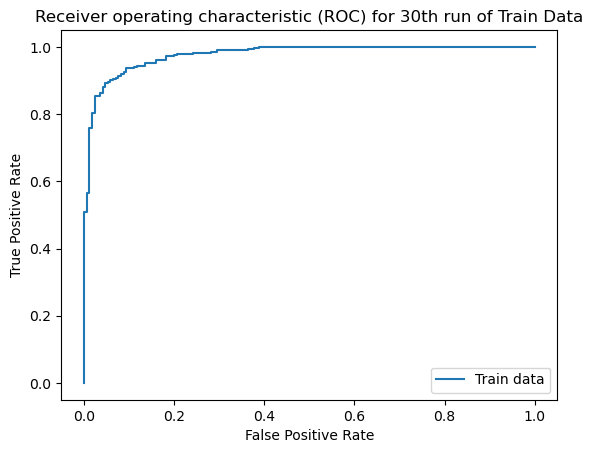

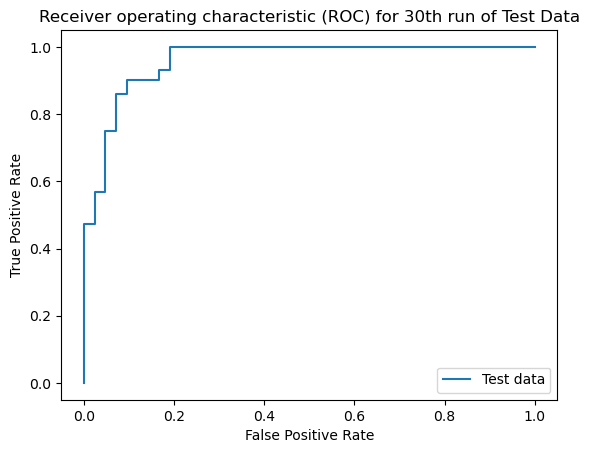

<function matplotlib.pyplot.show(close=None, block=None)>

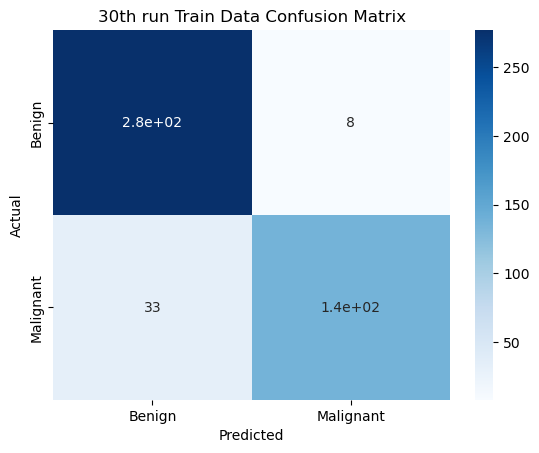

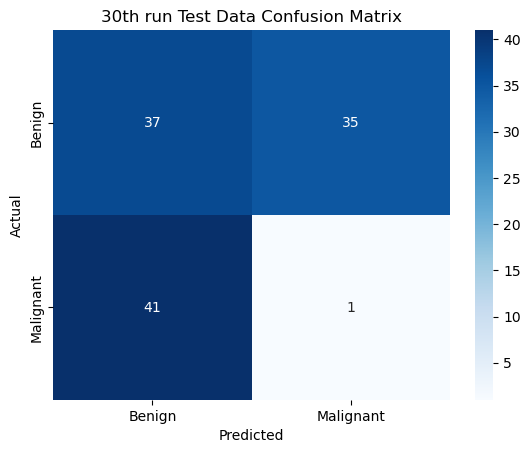

In [14]:
iii1_train_acc_avg = np.mean(results_train['train_acc'])
iii1_train_prec_avg = np.mean(results_train['train_prec'])
iii1_train_rec_avg = np.mean(results_train['train_rec'])
iii1_train_f1_avg = np.mean(results_train['train_f1'])
iii1_train_auc_avg = np.mean(results_train['train_auc'])
iii1_test_acc_avg = np.mean(results_test['test_acc'])
iii1_test_prec_avg = np.mean(results_test['test_prec'])
iii1_test_rec_avg = np.mean(results_test['test_rec'])
iii1_test_f1_avg = np.mean(results_test['test_f1'])
iii1_test_auc_avg = np.mean(results_test['test_auc'])
print(f'Training data, unsupervised learning averages have \nAccuracy:', iii1_train_acc_avg, '\nPrecision:', iii1_train_prec_avg,
     '\nRecall:', iii1_train_rec_avg, '\nF1 score:', iii1_train_f1_avg, '\nAUC:', iii1_train_auc_avg)
print(f'\nTest data, unsupervised learning averages have \nAccuracy:', iii1_test_acc_avg, '\nPrecision:', iii1_test_prec_avg,
     '\nRecall:', iii1_test_rec_avg, '\nF1 score:', iii1_test_f1_avg, '\nAUC:', iii1_test_auc_avg)

plt.plot(fpr_train, tpr_train, label='Train data' % train_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) for 30th run of Train Data')
plt.legend(loc="lower right")
plt.show()

plt.plot(fpr_test, tpr_test, label='Test data' % train_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) for 30th run of Test Data')
plt.legend(loc="lower right")
plt.show()

action = ['Benign', 'Malignant']
plt.figure()
sns.heatmap(train_cm, annot=True, cmap='Blues', xticklabels=action, yticklabels=action)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('30th run Train Data Confusion Matrix')
plt.show

plt.figure()
sns.heatmap(test_cm, annot=True, cmap='Blues', xticklabels=action, yticklabels=action)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('30th run Test Data Confusion Matrix')
plt.show

#### (iv) Spectral Clustering

In [15]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    M = range(1,31,1)
    results_train = {'train_acc': [],'train_prec': [],'train_rec': [],'train_f1': [],'train_cm': [],'train_auc': [], 'probs': []}
    results_test = {'test_acc': [],'test_prec': [],'test_rec': [],'test_f1': [],'test_cm': [],'test_auc': [], 'testprobs': []}

    for iiib1 in M:
        print('Run', iiib1, 'is completed')
        
        x_specc = np.array(x_train)
        y_specc = np.array(y_train)
        testx_specc = np.array(x_test)
        testy_specc = np.array(y_test)

        sc = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
        fp_ytrain = sc.fit_predict(x_specc)

        cluster_label = {}
        for sccluster in np.unique(fp_ytrain):
            truecluster = y_specc[fp_ytrain == sccluster]
            majority = Counter(truecluster).most_common(1)[0][0]
            cluster_label.update({sccluster: majority})
        reverse_cluster_label = {v: k for k, v in cluster_label.items()}

        neighbor_model = KNeighborsClassifier(n_neighbors=30)
        neighbor_model.fit(x_specc, fp_ytrain)
        spec_probs = neighbor_model.predict_proba(x_specc)[np.arange(len(fp_ytrain)), 1 - fp_ytrain]
        fpr_train, tpr_train, _ = roc_curve(y_specc, spec_probs, pos_label='M')

        pred_y = [cluster_label[x] for x in fp_ytrain]

        train_acc = accuracy_score(y_specc, pred_y)
        train_prec = precision_score(y_specc, pred_y, pos_label='M')
        train_rec = recall_score(y_specc, pred_y, pos_label='M')
        train_f1 = f1_score(y_specc, pred_y, pos_label='M')
        train_cm = confusion_matrix(y_specc, pred_y)

        neighbor_model = KNeighborsClassifier(n_neighbors=30)
        neighbor_model.fit(testx_specc, testy_specc)
        pred_testy = neighbor_model.predict(testx_specc)

        spec_probs = neighbor_model.predict_proba(testx_specc)[np.arange(len(pred_testy)), 1 - np.vectorize(reverse_cluster_label.get)(pred_testy)]
        fpr_test, tpr_test, _ = roc_curve(testy_specc, spec_probs, pos_label='M')
        pred_testy = np.array(pred_testy)
        test_acc = accuracy_score(testy_kmean, pred_testy)
        test_prec = precision_score(testy_kmean, pred_testy, pos_label='M')
        test_rec = recall_score(testy_kmean, pred_testy, pos_label='M')
        test_f1 = f1_score(testy_kmean, pred_testy, pos_label='M')
        test_cm = confusion_matrix(testy_kmean, pred_testy)
        
        results_train['train_acc'].append(train_acc)
        results_train['train_prec'].append(train_prec)
        results_train['train_rec'].append(train_rec)
        results_train['train_f1'].append(train_f1)
        results_train['train_cm'].append(train_cm)

        results_test['test_acc'].append(test_acc)
        results_test['test_prec'].append(test_prec)
        results_test['test_rec'].append(test_rec)
        results_test['test_f1'].append(test_f1)
        results_test['test_cm'].append(test_cm)

Run 1 is completed
Run 2 is completed
Run 3 is completed
Run 4 is completed
Run 5 is completed
Run 6 is completed
Run 7 is completed
Run 8 is completed
Run 9 is completed
Run 10 is completed
Run 11 is completed
Run 12 is completed
Run 13 is completed
Run 14 is completed
Run 15 is completed
Run 16 is completed
Run 17 is completed
Run 18 is completed
Run 19 is completed
Run 20 is completed
Run 21 is completed
Run 22 is completed
Run 23 is completed
Run 24 is completed
Run 25 is completed
Run 26 is completed
Run 27 is completed
Run 28 is completed
Run 29 is completed
Run 30 is completed


Training data, spectral clustering averages have 
Accuracy: 0.6307692307692309 
Precision: 1.0 
Recall: 0.011764705882352944 
F1 score: 0.02325581395348838 
AUC: nan

Test data, spectral clustering averages have 
Accuracy: 0.9210526315789476 
Precision: 1.0 
Recall: 0.7857142857142855 
F1 score: 0.8799999999999998 
AUC: nan


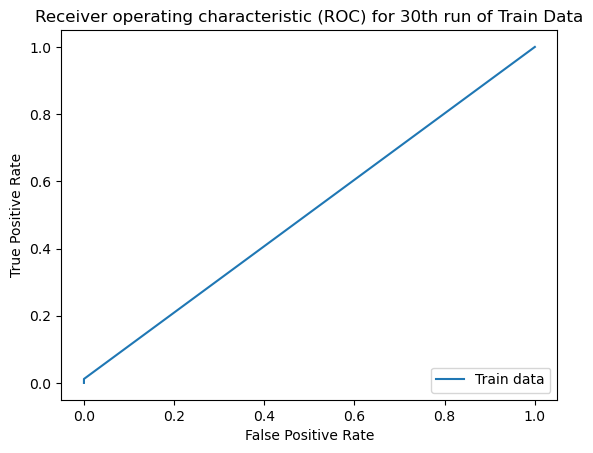

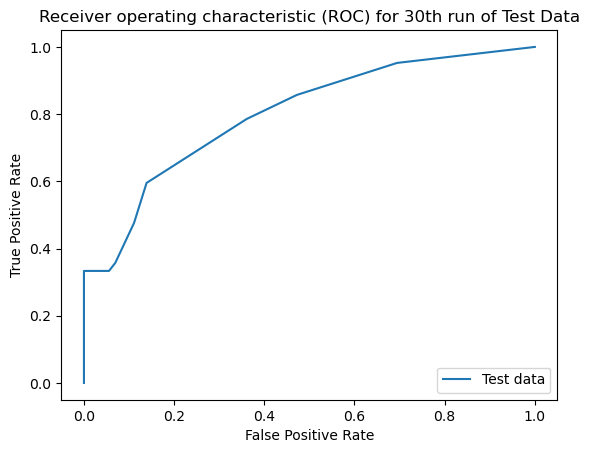

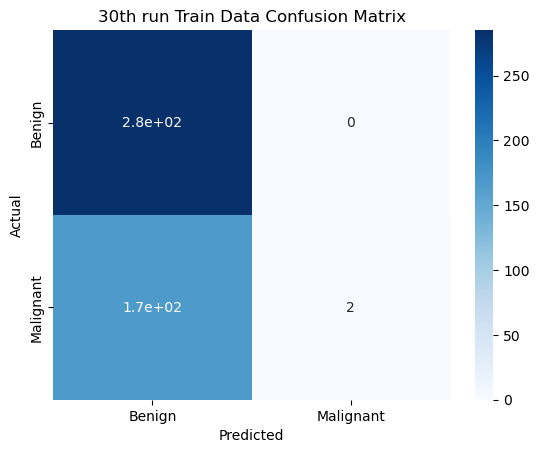

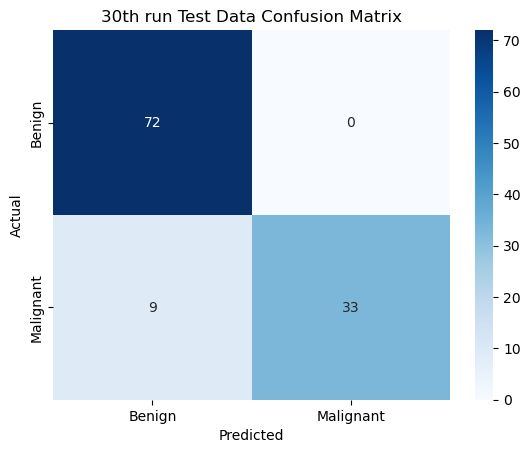

In [16]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    iv1_train_acc_avg = np.mean(results_train['train_acc'])
    iv1_train_prec_avg = np.mean(results_train['train_prec'])
    iv1_train_rec_avg = np.mean(results_train['train_rec'])
    iv1_train_f1_avg = np.mean(results_train['train_f1'])
    iv1_train_auc_avg = np.mean(results_train['train_auc'])
    iv1_test_acc_avg = np.mean(results_test['test_acc'])
    iv1_test_prec_avg = np.mean(results_test['test_prec'])
    iv1_test_rec_avg = np.mean(results_test['test_rec'])
    iv1_test_f1_avg = np.mean(results_test['test_f1'])
    iv1_test_auc_avg = np.mean(results_test['test_auc'])
    print(f'Training data, spectral clustering averages have \nAccuracy:', iv1_train_acc_avg, '\nPrecision:', iv1_train_prec_avg,
         '\nRecall:', iv1_train_rec_avg, '\nF1 score:', iv1_train_f1_avg, '\nAUC:', iv1_train_auc_avg)
    print(f'\nTest data, spectral clustering averages have \nAccuracy:', iv1_test_acc_avg, '\nPrecision:', iv1_test_prec_avg,
         '\nRecall:', iv1_test_rec_avg, '\nF1 score:', iv1_test_f1_avg, '\nAUC:', iv1_test_auc_avg)

    plt.plot(fpr_train, tpr_train, label='Train data' % train_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) for 30th run of Train Data')
    plt.legend(loc="lower right")
    plt.show()

    plt.plot(fpr_test, tpr_test, label='Test data' % train_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) for 30th run of Test Data')
    plt.legend(loc="lower right")
    plt.show()

    action = ['Benign', 'Malignant']
    plt.figure()
    sns.heatmap(train_cm, annot=True, cmap='Blues', xticklabels=action, yticklabels=action)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('30th run Train Data Confusion Matrix')
    plt.show

    plt.figure()
    sns.heatmap(test_cm, annot=True, cmap='Blues', xticklabels=action, yticklabels=action)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('30th run Test Data Confusion Matrix')
    plt.show

#### (iv) Compare

In [17]:
print(f'When comparing the results of the average accuracy, f1, recall, and precision, we do see that supervised learning works a little better than semi-supervised learning. The accuracy is better with supervised learning. When comparing unsupervised to the other methods, we see that it actually does worse than supervised and semisupervised methods. The test data did better with spectral clustering.')

When comparing the results of the average accuracy, f1, recall, and precision, we do see that supervised learning works a little better than semi-supervised learning. The accuracy is better with supervised learning. When comparing unsupervised to the other methods, we see that it actually does worse than supervised and semisupervised methods. The test data did better with spectral clustering.


## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [18]:
dfbn = pd.read_csv('data_banknote_authentication.csv', header=None)
train, test = train_test_split(dfbn, test_size=472, train_size=900, random_state=1)
trainx = train.iloc[:,0:4]
trainy = train.iloc[:,4]
testx = test.iloc[:, 0:4]
testy = test.iloc[:,4]
scaler = StandardScaler()
scaler.fit(trainx)
sc_trainx = scaler.transform(trainx)
sc_testx = scaler.transform(testx)

b2_trainx = pd.DataFrame(sc_trainx.copy())
b2_trainy = trainy.reset_index(drop=True)
b2_train = pd.concat([b2_trainx, b2_trainy], axis=1)

print(sc_trainx)
print(sc_testx)

[[-0.93074771  0.25839377 -0.61765205 -0.71855488]
 [ 1.34621035 -0.90136358  0.30384752  0.66162983]
 [-0.31846754  0.07678308 -1.04232317  0.05738445]
 ...
 [-1.71195701  0.72779319 -0.18280198 -2.06276554]
 [ 0.57943546  0.02298737  0.20520268  0.51722843]
 [-0.97880289  0.30859495 -0.48976208 -0.04053056]]
[[-1.42051753e+00 -4.81731024e-04 -2.76071909e-01 -6.12540194e-01]
 [ 3.16757630e-01  4.62042726e-01  2.33601168e-01  6.65344182e-01]
 [-1.58712073e+00 -1.78165544e+00  2.69154615e+00 -1.31639930e-01]
 ...
 [-2.25462011e-01  1.27770296e+00 -1.21726174e+00 -2.70666578e+00]
 [ 6.67399667e-01  1.24592807e+00 -1.10533686e+00 -6.53088588e-02]
 [-1.21947180e+00 -2.76710403e-01 -2.12233360e-01  5.90357961e-01]]


### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [19]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    train_active = b2_train.copy()
    test_errs = []
    train_errs = []
    pool = pd.DataFrame(columns=train_active.columns)
    
    def get_closest_points(train_active, num=10, separate_classes=False):
        if separate_classes:
            has_both_classes = False
            while not has_both_classes:
                pool_train = train_active.sample(num)
                class_set = set(pool_train.iloc[:, 4])
                has_both_classes = 1 in class_set and 0 in class_set
            return pool_train.index
        else:
            pool_train = train_active.sample(num)
            return pool_train.index
    separate_classes = True
    for i in range(90):
        points_index_in_train = get_closest_points(train_active, separate_classes=separate_classes)
        separate_classes = False
        pool = pool.append(train_active.loc[points_index_in_train])
        train_active = train_active.drop(points_index_in_train, axis=0)
        
        xtrain_pool = pool.iloc[:,0:4]
        ytrain_pool = pool.iloc[:,4].astype(int)
        svm = LinearSVC(penalty = 'l1', dual=False)
        param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
        cv_obj = GridSearchCV(svm, param_grid, cv=5)
        cv_obj.fit(xtrain_pool, ytrain_pool)
        bestC = cv_obj.best_params_['C']
        model = LinearSVC(penalty = 'l1', dual=False, C=bestC)
        model = model.fit(xtrain_pool, ytrain_pool)

        ypred_test = model.predict(sc_testx)
        test_error = 1 - accuracy_score(testy, ypred_test)
        test_errs.append(test_error)
        
        ypred_train = model.predict(xtrain_pool)
        train_error = 1 - accuracy_score(ytrain_pool, ypred_train)
        train_errs.append(train_error)

#### (ii) Active

In [20]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    train_active = b2_train.copy()
    pool = pd.DataFrame(columns=train_active.columns)

    act_train_errs = []
    act_test_errs = []
    def get_closest_points(train_active, num=10, model=None):
        if model is None:
            has_both_classes = False
            while not has_both_classes:
                pool_train = train_active.sample(num)
                class_set = set(pool_train.iloc[:, 4])
                has_both_classes = 1 in class_set and 0 in class_set
            return pool_train.index
        else:
            distances = model.decision_function(train_active.iloc[:, 0:4].values)  
            absdist = np.abs(distances)
            closest_indices = np.argsort(absdist, axis=0)[:num].flatten()
            return train_active.index[closest_indices]

    pool_history = []
    train_pred_history = []
    model = None
    for i in range(90):
        points_index_in_train = get_closest_points(train_active, model=model)
        pool = pool.append(train_active.loc[points_index_in_train])
        pool_history.append(pool.copy())
        train_active = train_active.drop(points_index_in_train, axis=0)

        xtrain_pool = pool.iloc[:, :-1]
        ytrain_pool = pool.iloc[:, -1].values.astype(int)
        param_grid = {'C': [0.01, 0.1, 1, 10]}
        svm = LinearSVC(penalty='l1', dual=False, fit_intercept=False)
        cv_obj = GridSearchCV(svm, param_grid, cv=5)
        cv_obj = cv_obj.fit(xtrain_pool, ytrain_pool)
        bestC = cv_obj.best_params_['C']
        model = LinearSVC(penalty='l1', dual=False, fit_intercept=False, C=bestC)
        model = model.fit(xtrain_pool, ytrain_pool)

        ypred_test = model.predict(sc_testx)
        test_error = 1 - accuracy_score(testy.values.astype(int), ypred_test.astype(int))
        act_test_errs.append(test_error)
        
        ypred_train = model.predict(xtrain_pool.values)
        train_pred_history.append(ypred_train)
        train_error = 1 - accuracy_score(ytrain_pool.astype(int), ypred_train.astype(int))
        act_train_errs.append(train_error)

### (c) Average the 50 test errors

In [21]:
 with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    M50train_errors = []
    M50test_errors = []
    M = range(1,51,1)
    for ib2 in M:
        train_active = b2_train.copy()
        test_errs = []
        train_errs = []
        pool = pd.DataFrame(columns=train_active.columns)
        def get_closest_points(train_active, num=10, separate_classes=False):
            if separate_classes:
                has_both_classes = False
                while not has_both_classes:
                    pool_train = train_active.sample(num)
                    class_set = set(pool_train.iloc[:, 4])
                    has_both_classes = 1 in class_set and 0 in class_set
                return pool_train.index
            else:
                pool_train = train_active.sample(num)
                return pool_train.index
        separate_classes = True
        for i in range(90):
            points_index_in_train = get_closest_points(train_active, separate_classes=separate_classes)
            separate_classes = False
            pool = pool.append(train_active.loc[points_index_in_train])
            train_active = train_active.drop(points_index_in_train, axis=0)

            xtrain_pool = pool.iloc[:,0:4]
            ytrain_pool = pool.iloc[:,4].astype(int)
            svm = LinearSVC(penalty = 'l1', dual=False)
            param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
            cv_obj = GridSearchCV(svm, param_grid, cv=5)
            cv_obj.fit(xtrain_pool, ytrain_pool)
            bestC = cv_obj.best_params_['C']
            model = LinearSVC(penalty = 'l1', dual=False, C=bestC)
            model = model.fit(xtrain_pool, ytrain_pool)

            ypred_test = model.predict(sc_testx)
            test_error = 1 - accuracy_score(testy, ypred_test)
            test_errs.append(test_error)

            ypred_train = model.predict(xtrain_pool)
            train_error = 1 - accuracy_score(ytrain_pool, ypred_train)
            train_errs.append(train_error)
        M50train_errors.append(train_errs)
        M50test_errors.append(test_errs)
        print(f'Run', ib2, 'is complete')

Run 1 is complete
Run 2 is complete
Run 3 is complete
Run 4 is complete
Run 5 is complete
Run 6 is complete
Run 7 is complete
Run 8 is complete
Run 9 is complete
Run 10 is complete
Run 11 is complete
Run 12 is complete
Run 13 is complete
Run 14 is complete
Run 15 is complete
Run 16 is complete
Run 17 is complete
Run 18 is complete
Run 19 is complete
Run 20 is complete
Run 21 is complete
Run 22 is complete
Run 23 is complete
Run 24 is complete
Run 25 is complete
Run 26 is complete
Run 27 is complete
Run 28 is complete
Run 29 is complete
Run 30 is complete
Run 31 is complete
Run 32 is complete
Run 33 is complete
Run 34 is complete
Run 35 is complete
Run 36 is complete
Run 37 is complete
Run 38 is complete
Run 39 is complete
Run 40 is complete
Run 41 is complete
Run 42 is complete
Run 43 is complete
Run 44 is complete
Run 45 is complete
Run 46 is complete
Run 47 is complete
Run 48 is complete
Run 49 is complete
Run 50 is complete


In [22]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    act_M50train_errors = []
    act_M50test_errors = []
    M = range(1,51,1)
    for ib2 in M:
        print(f'Run', ib2, 'is complete')
        train_active = b2_train.copy()
        pool = pd.DataFrame(columns=train_active.columns)

        act_train_errs = []
        act_test_errs = []
        def get_closest_points(train_active, num=10, model=None):
            if model is None:
                has_both_classes = False
                while not has_both_classes:
                    pool_train = train_active.sample(num)
                    class_set = set(pool_train.iloc[:, 4])
                    has_both_classes = 1 in class_set and 0 in class_set
                return pool_train.index
            else:
                distances = model.decision_function(train_active.iloc[:, 0:4].values)  
                absdist = np.abs(distances)
                closest_indices = np.argsort(absdist, axis=0)[:num].flatten()
                return train_active.index[closest_indices]

        pool_history = []
        train_pred_history = []
        model = None
        for i in range(90):
            points_index_in_train = get_closest_points(train_active, model=model)
            pool = pool.append(train_active.loc[points_index_in_train])
            pool_history.append(pool.copy())
            train_active = train_active.drop(points_index_in_train, axis=0)

            xtrain_pool = pool.iloc[:, :-1]
            ytrain_pool = pool.iloc[:, -1].values.astype(int)
            param_grid = {'C': [0.01, 0.1, 1, 10]}
            svm = LinearSVC(penalty='l1', dual=False, fit_intercept=False)
            cv_obj = GridSearchCV(svm, param_grid, cv=5)
            cv_obj = cv_obj.fit(xtrain_pool, ytrain_pool)
            bestC = cv_obj.best_params_['C']
            model = LinearSVC(penalty='l1', dual=False, fit_intercept=False, C=bestC)
            model = model.fit(xtrain_pool, ytrain_pool)

            ypred_test = model.predict(sc_testx)
            test_error = 1 - accuracy_score(testy.values.astype(int), ypred_test.astype(int))
            act_test_errs.append(test_error)

            ypred_train = model.predict(xtrain_pool.values)
            train_pred_history.append(ypred_train)
            train_error = 1 - accuracy_score(ytrain_pool.astype(int), ypred_train.astype(int))
            act_train_errs.append(train_error)
        act_M50test_errors.append(act_test_errs)
        act_M50train_errors.append(act_train_errs)

Run 1 is complete
Run 2 is complete
Run 3 is complete
Run 4 is complete
Run 5 is complete
Run 6 is complete
Run 7 is complete
Run 8 is complete
Run 9 is complete
Run 10 is complete
Run 11 is complete
Run 12 is complete
Run 13 is complete
Run 14 is complete
Run 15 is complete
Run 16 is complete
Run 17 is complete
Run 18 is complete
Run 19 is complete
Run 20 is complete
Run 21 is complete
Run 22 is complete
Run 23 is complete
Run 24 is complete
Run 25 is complete
Run 26 is complete
Run 27 is complete
Run 28 is complete
Run 29 is complete
Run 30 is complete
Run 31 is complete
Run 32 is complete
Run 33 is complete
Run 34 is complete
Run 35 is complete
Run 36 is complete
Run 37 is complete
Run 38 is complete
Run 39 is complete
Run 40 is complete
Run 41 is complete
Run 42 is complete
Run 43 is complete
Run 44 is complete
Run 45 is complete
Run 46 is complete
Run 47 is complete
Run 48 is complete
Run 49 is complete
Run 50 is complete


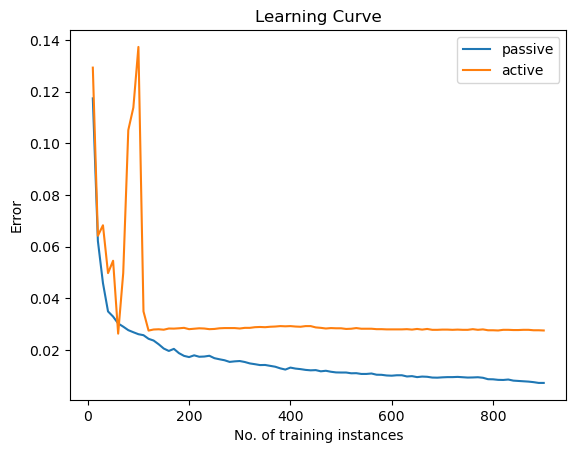

In [23]:
avg_passive = pd.DataFrame(M50test_errors).mean()
avg_active = pd.DataFrame(act_M50test_errors).mean()
plt.plot(range(10,910,10), avg_passive)
plt.plot(range(10,910,10), avg_active)
plt.legend(['passive', 'active'])
plt.xlabel('No. of training instances')
plt.ylabel('Error')
plt.title('Learning Curve')
plt.show()